# Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation de la base de donnée
La base de donnée a été clean dans le fichier 'clean_bdd.ipynb'

In [2]:
df = pd.read_csv('train_clean.csv', sep=',', encoding='utf-8')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
PassengerId       889 non-null int64
Survived          889 non-null int64
Pclass            889 non-null int64
Name              889 non-null object
Sex               889 non-null object
Age               889 non-null float64
SibSp             889 non-null int64
Parch             889 non-null int64
Ticket            889 non-null object
Fare              889 non-null float64
Embarked          889 non-null object
Age_categories    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


## Récapitulation des différentes variable :
#### PassengerId : Une colonne ajoutée par Kaggle pour identifier chaque ligne,
#### Pclass : La classe de ticket que le passager à acheter (1=1ère, 2=2nd, 3=3ème)
#### Name : Nom des passagers
#### Sex : Homme ou Femme
#### Age : Age du passager
#### SibSp : Le nombre de frères et sœurs ou de conjoints que le passager avait à bord du Titanic
#### Parch : Le nombre de parents ou d'enfants que le passager avait à bord du Titanic
#### Ticket : Le numéro de ticket du passager
#### Fare : Le prix payé par le passager
#### Embarked : La porte d'embarquement (C=Cherbourg, Q=Queenstown, S=Southampton)

### Visualisation des différentes variables

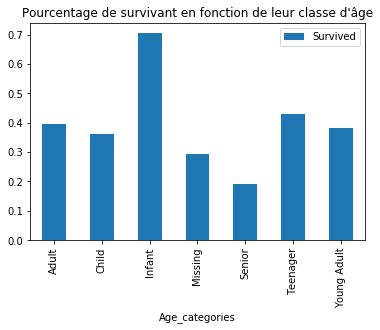

,Survived
Age_categories,
Adult,0.396907
Child,0.360000
Infant,0.704545
Missing,0.293785
Senior,0.190476
Teenager,0.428571
Young Adult,0.382682


In [3]:
age_cat_pivot = df.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar(title="Pourcentage de survivant en fonction de leur classe d'âge")
plt.show()
age_cat_pivot

,Survived
Sex,
female,0.740385
male,0.188908


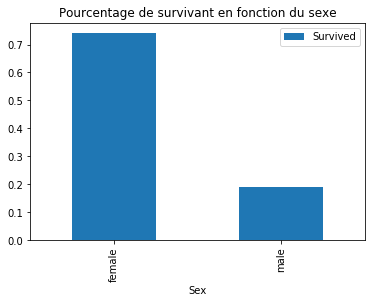

In [4]:
sex_plot = df.pivot_table(index="Sex",values="Survived")
sex_plot.plot.bar(title="Pourcentage de survivant en fonction du sexe")
sex_plot

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


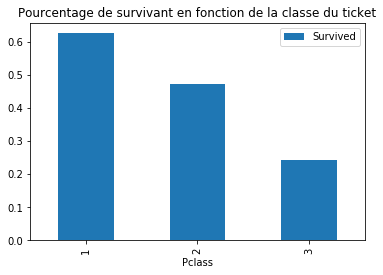

In [5]:
pclass_plot = df.pivot_table(index="Pclass",values="Survived")
pclass_plot.plot.bar(title="Pourcentage de survivant en fonction de la classe du ticket")
pclass_plot

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


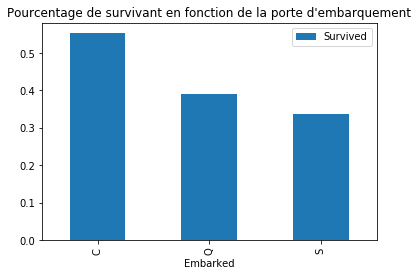

In [6]:
embarked_plot = df.pivot_table(index="Embarked",values="Survived")
embarked_plot.plot.bar(title="Pourcentage de survivant en fonction de la porte d'embarquement")
embarked_plot

,Survived
SibSp,
0,0.343234
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


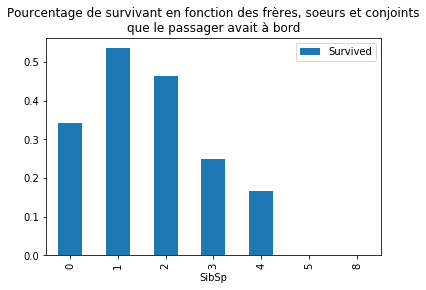

In [7]:
sibsp_plot = df.pivot_table(index="SibSp",values="Survived")
sibsp_plot.plot.bar(title='Pourcentage de survivant en fonction des frères, soeurs et conjoints\nque le passager avait à bord')
sibsp_plot

,Survived
Parch,
0,0.341716
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


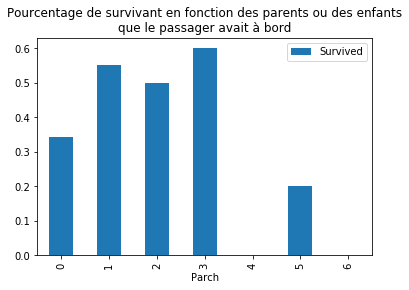

In [8]:
parch_plot = df.pivot_table(index="Parch",values="Survived")
parch_plot.plot.bar(title="Pourcentage de survivant en fonction des parents ou des enfants\nque le passager avait à bord")
parch_plot

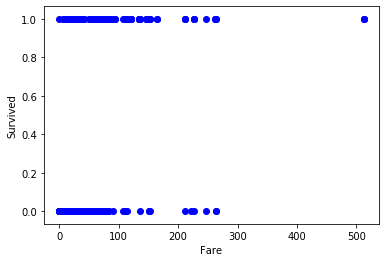

In [9]:
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.scatter(df['Fare'], df['Survived'], color='blue', label='')
plt.show()

#### Avec ce graphique, nous ne pouvons pas affirmer que le prix payer par les passagers influent sur la survie de ceux-ci.

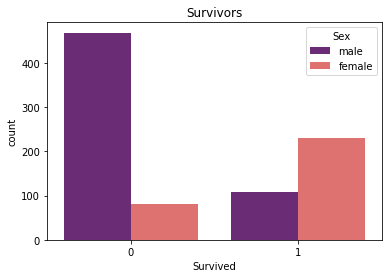

,Survived
Sex,
female,0.740385
male,0.188908


In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'magma')
plt.title('Survivors')
plt.show()
sex_plot

#### On peut observer que les femmes ont beaucoup plus survécu que les hommes.

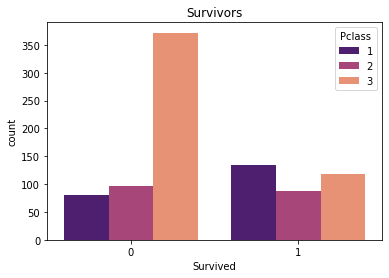

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'magma')
plt.title('Survivors')
plt.show()
pclass_plot

#### On peut observer qu'une grande partie des décets étaient les passagers ayant des tickets de 3ème classe.

### Conclusion des différents graphiques : 
#### Nous pouvons observer sur ces différents graphiques que certaines variable influent plus que d'autres sur la survivabilité des passagers.
#### Par exemple : 
    - la classe du ticket a eu un impact sur la survie des passagers.
    - les femmes ont proportionnellement beaucoup plus survécu que les hommes (elles ont probablement été privilégiés)
    - on ne peut pas observer un quelconque impact du prix payer par les passagers sur leur survie.
    - l'âge a eu un impact sur la survie des passagers (les enfants ont probablement été privilégiés)

## Bonus :

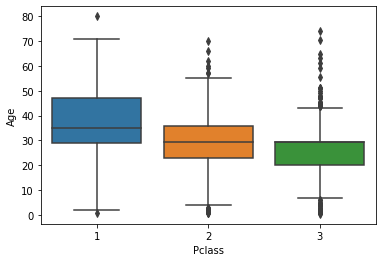

In [21]:
sns.boxplot(data=df, y='Age', x='Pclass')

Nous pouvons observer que les personnes les plus agées avaient tendance à avoir un meilleur ticket.

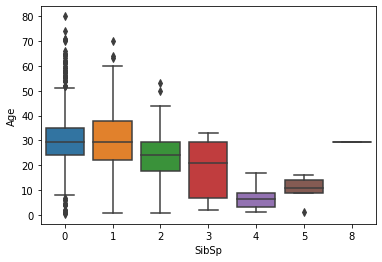

In [20]:
sns.boxplot(data=df, y='Age', x='SibSp')

Nous pouvons observer que les personnes ayant de nombreux frères et soeurs sont plus jeunes que les personnes venant seul ou en plus petits groupes.

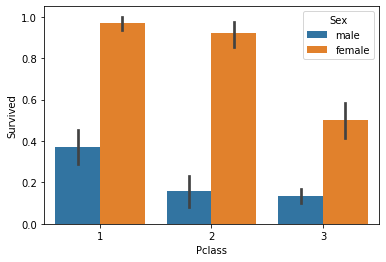

In [13]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df,order=None,hue_order=None)

Nous pouvons observer que les femmes ont plus de chances de survie que les hommes. Nous pouvons aussi confirmer que la classe de ticket a eu un impact sur la survie des passagers.